In [51]:
import pandas as pd
import numpy as np

In [52]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [53]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['std', 'figure', 'mean', 'show']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [54]:
train = pd.read_csv('updated_train.csv')
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,h_distance,day,month,hour,minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,1.498521,1.497580,14,3,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,1.805507,1.804374,12,6,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,6.385098,6.381090,19,1,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,1.485498,1.484566,6,4,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,1.188588,1.187842,26,3,13,30


In [78]:
test = pd.read_csv('updated_test.csv')
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,h_distance,day,month,hour,minute
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2.746426,2.744701,30,6,23,59
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2.759239,2.757507,30,6,23,59
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,1.306155,1.305335,30,6,23,59
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,5.269088,5.265780,30,6,23,59
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,0.960842,0.960239,30,6,23,59


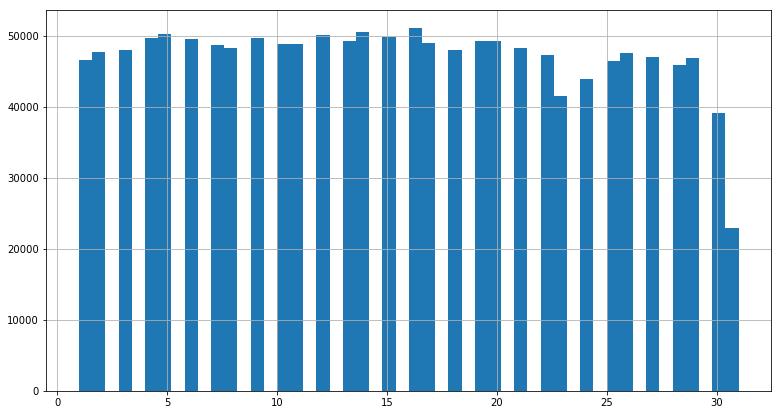

In [56]:
train['day'].hist(figsize=[13,7],bins=50)

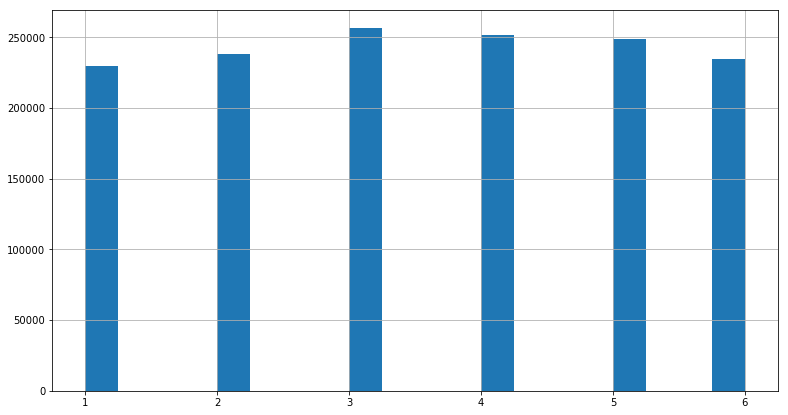

In [57]:
train['month'].hist(figsize=[13,7],bins=20)

In [58]:
mean = train['trip_duration'].mean()
std = train['trip_duration'].std()

In [59]:
mean,std

(959.4922729603659, 5237.431724497702)

In [60]:
train = train[(train['trip_duration']>(mean-(2*std))) & (train['trip_duration']<(mean+(2*std))) ]

In [61]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,h_distance,day,month,hour,minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,1.498521,1.497580,14,3,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,1.805507,1.804374,12,6,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,6.385098,6.381090,19,1,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,1.485498,1.484566,6,4,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,1.188588,1.187842,26,3,13,30


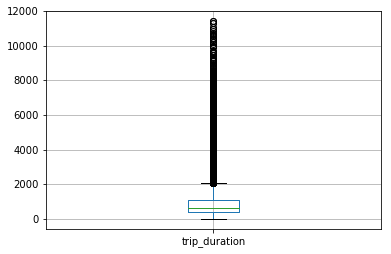

In [62]:
train.boxplot(column='trip_duration')

In [63]:
(train['trip_duration']>10000).sum()

19

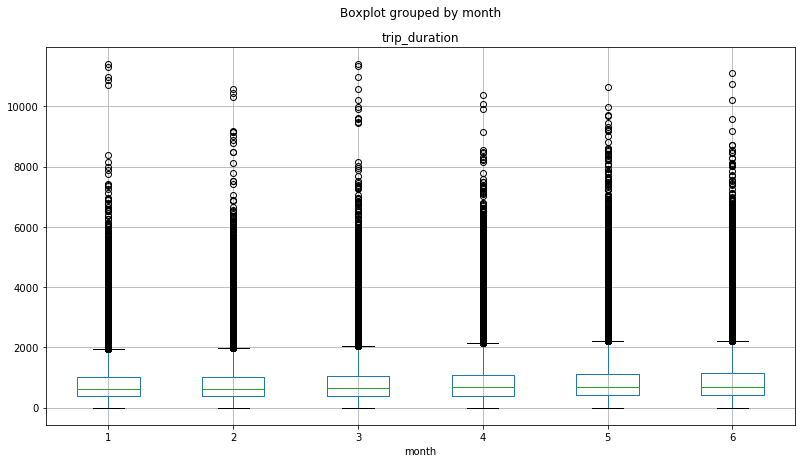

In [64]:
train.boxplot(column='trip_duration',by='month',figsize=[13,7])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF04A17CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001AEC8D8F780>]], dtype=object)

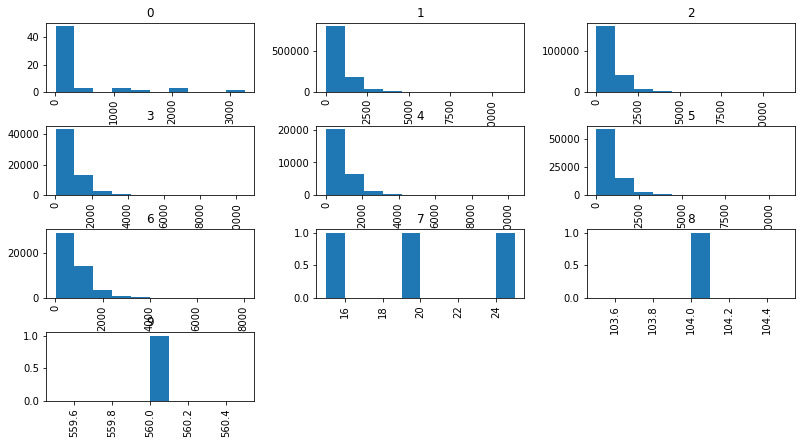

In [65]:
train.hist(column='trip_duration',by='passenger_count',figsize=[13,7])

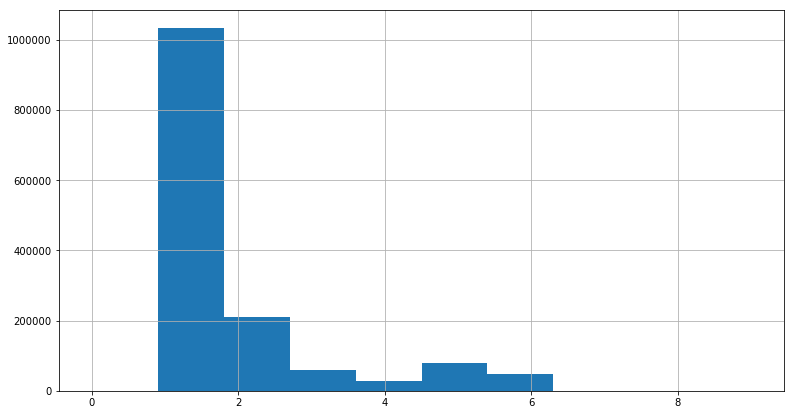

In [66]:
train['passenger_count'].hist(figsize=[13,7])

In [67]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost.sklearn import XGBRegressor

In [68]:
features = ['vendor_id', 'passenger_count','store_and_fwd_flag','day', 'month', 'hour', 'minute','h_distance']

In [80]:
xgb = XGBRegressor(learning_rate =0.01, n_estimators=1000, max_depth=9,
                   min_child_weight=3, gamma=0.005, colsample_bylevel=0.60 , colsample_bytree=0.6,
                   objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27,subsample=0.7,reg_alpha=0.01)

In [81]:
xgb.fit(train[features],train['trip_duration'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
       colsample_bytree=0.6, gamma=0.005, learning_rate=0.01,
       max_delta_step=0, max_depth=9, min_child_weight=3, missing=None,
       n_estimators=1000, nthread=4, objective='reg:linear',
       reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=True, subsample=0.7)

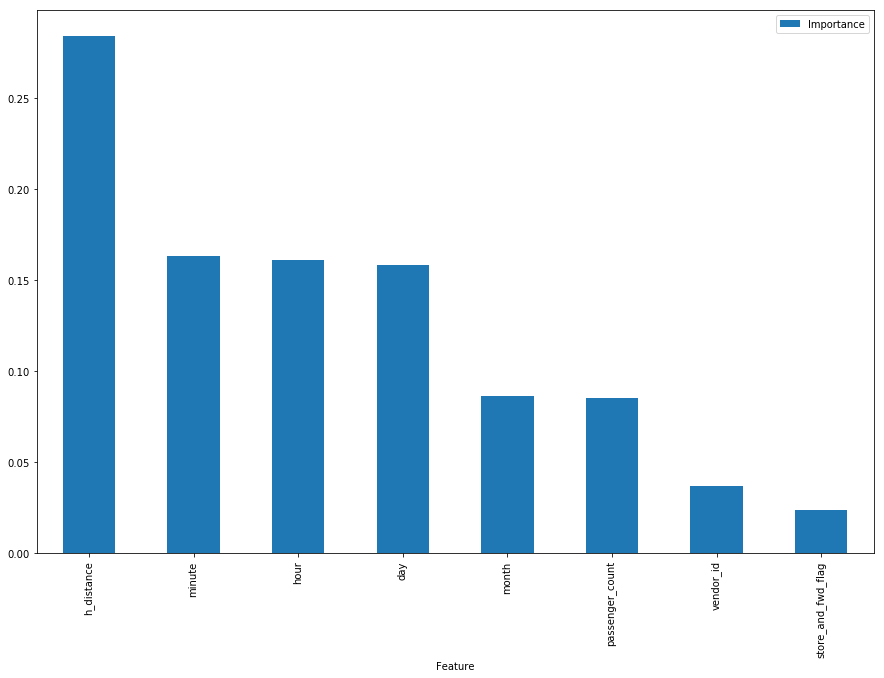

In [82]:
feature_importance = pd.Series(xgb.feature_importances_)
feature_ser = pd.Series(features)
lis = pd.Series(feature_importance.values,index = feature_ser)
lis = sorted(lis.items(),key =lambda x:(-x[1],x[0]))
df = pd.DataFrame(lis, columns=['Feature', 'Importance'])
df.plot(kind='bar',x='Feature',figsize=(15,10))

In [83]:
pred = xgb.predict(test[features])
print('prediction is done')

prediction is done


In [84]:
def update(x):
    if(x<0):
        return -x
    return x

In [85]:
len(pred),len(test),len(train)

(625134, 625134, 1456540)

In [86]:
sub = pd.DataFrame()
sub['id'] = test['id']
sub['trip_duration'] = pred
sub['trip_duration'] = sub['trip_duration'].apply(lambda x:update(x))
sub.to_csv('xgb.csv', index=False)
print('writting is done.')

writting is done.
